In [1]:
import sys, os
from os.path import abspath, sep, pardir
sys.path.append(abspath('') + sep + pardir)
#create basepath based on folder containing 'DataF2181', 'Analysis', and others
#basepath=abspath('') + sep + pardir


import numpy as np
import matplotlib.pyplot as plt
from Tools.plotting_params import *
from Tools.loading_funcs import basepath,load_grating_evoked_data
#from Tools.plotting_functions import 

In [2]:
from Tools.opm_functions import opm_from_tuning, opm_to_rgb
import matplotlib.transforms as transforms

def clip_std(frame, sigma=3):
    f_mean=np.nanmean(frame)
    f_std=np.nanstd(frame)
    f_white = (frame-f_mean)/f_std
    return np.clip(f_white, a_min=-sigma, a_max=sigma)

tr = transforms.Affine2D().rotate_deg_around(68,80,71)

In [3]:
grating_data_binoc=load_grating_evoked_data(key='binocular',
                            all_dates=['-2','+0','+2','+4','+6'],
                            basepath='..',
                            animal='2181')

In [4]:
all_grating_days = [*grating_data_binoc]
roi=np.asarray(~np.isnan(grating_data_binoc[all_grating_days[0]]['1s'][0,0]), dtype='bool')

Idate=all_grating_days[0]
Jdate=all_grating_days[-1]

grating_data_Iday = np.copy(grating_data_binoc[Idate]['0.5s'][:,:, roi])    
grating_data_Jday = np.copy(grating_data_binoc[Jdate]['0.5s'][:,:, roi]) 


## Figure 1j

59
0.22763750255541948


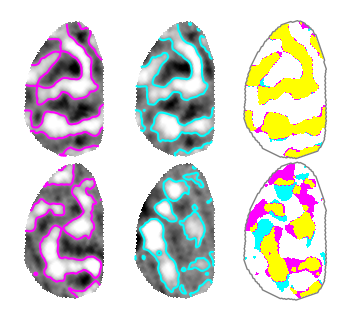

In [5]:
 #plot 
itrial=37#22 --> 37 in F order
jtrial=57#6#35    (staring at 54 or 126 is same orientation)


for jtrial in [59,]:
    print(jtrial)
    lw=0.75

    Idate=all_grating_days[0]
    Jdate=all_grating_days[-1]

    grating_data_Iday_t1 = np.copy(grating_data_binoc[Idate]['1s'][:,:, roi])    
    evoked_data_It1=np.reshape(grating_data_Iday_t1[:,:-1], 
                                  (-1, roi.sum()), order='F')
    means = np.nanmean(evoked_data_It1, axis=0)
    evoked_data_It1 = evoked_data_It1 - means[None,:]
    grating_data_Iday_t3 = np.copy(grating_data_binoc[Idate]['3s'][:,:, roi])    
    evoked_data_It3=np.reshape(grating_data_Iday_t3[:,:-1], 
                                  (-1, roi.sum()), order='F')
    means = np.nanmean(evoked_data_It3, axis=0)
    evoked_data_It3 = evoked_data_It3 - means[None,:]


    grating_data_Jday_t1 = np.copy(grating_data_binoc[Jdate]['1s'][:,:, roi])    
    evoked_data_Jt1=np.reshape(grating_data_Jday_t1[:,:-1], 
                                  (-1, roi.sum()), order='F')
    means = np.nanmean(evoked_data_Jt1, axis=0)
    evoked_data_Jt1 = evoked_data_Jt1 - means[None,:]
    grating_data_Jday_t3 = np.copy(grating_data_binoc[Jdate]['3s'][:,:, roi])    
    evoked_data_Jt3=np.reshape(grating_data_Jday_t3[:,:-1], 
                                  (-1, roi.sum()), order='F')
    means = np.nanmean(evoked_data_Jt3, axis=0)
    evoked_data_Jt3 = evoked_data_Jt3 - means[None,:]



    fig, axs=plt.subplots(nrows=2, ncols=3, figsize=cm2inch(4.3,3.95))
    plt.subplots_adjust(hspace=0, wspace=0.0, left=0.01, bottom=0.01, top=0.92, right=0.99)

    #iday
    ax=axs[1,0]
    frame_t1=np.empty_like(roi)*np.nan
    frame_t1[roi]=evoked_data_It1[itrial]
    im=ax.imshow(clip_std(frame_t1, sigma=2), cmap='Greys_r',
                 transform=tr + ax.transData)
    ax.contour(frame_t1,[0], colors=["magenta",], linewidths=[lw],
              transform=tr + ax.transData)

    ax.axis("off");ax.axis([25,100,130,20])

    ax=axs[1,1]
    frame_t3=np.empty_like(roi)*np.nan
    frame_t3[roi]=evoked_data_It3[itrial]
    im=ax.imshow(clip_std(frame_t3, sigma=2), cmap='Greys_r',
                 transform=tr + ax.transData)
    ax.contour(frame_t3,[0], colors=["cyan",], linewidths=[lw],
              transform=tr + ax.transData)
    ax.axis("off");ax.axis([25,100,130,20])

    ax=axs[1,2]
    frame_comb=np.empty_like(roi, dtype='float')*np.nan                
    frame_comb[(frame_t1>0)]=0
    frame_comb[(frame_t3>0)]=-1
    frame_comb[(frame_t1>0)&(frame_t3>0)]=1
    ax.contourf(frame_comb,levels=[-1,-0.5,0.5,1], alpha=1, 
           colors=["cyan", "magenta", "yellow"],
              transform=tr + ax.transData)
    ax.contour(roi,levels=[0,], alpha=1, 
           colors=["gray",],
              transform=tr + ax.transData, linewidths=0.5)
    ax.axis("off");ax.axis([25,100,130,20])

    print(np.corrcoef(evoked_data_It3[itrial], evoked_data_It1[itrial])[1,0])
    #jday
    ax=axs[0,0]
    frame_t1=np.empty_like(roi)*np.nan
    frame_t1[roi]=evoked_data_Jt1[jtrial]
    im=ax.imshow(clip_std(frame_t1, sigma=2), cmap='Greys_r',
                 transform=tr + ax.transData)
    ax.contour(frame_t1,[0], colors=["magenta",], linewidths=[lw],
              transform=tr + ax.transData)
    ax.axis("off");ax.axis([25,100,130,20])

    #ax.set_title("Short (1s)", fontsize=8, color='magenta')
    # ax.text(0.5, 1.05, "Short (1s)", fontsize=8, color='magenta',
    #         horizontalalignment='center',
    #           transform=ax.transAxes)
    # ax.text(0.5, 1.05, "Short (1s)", fontsize=7, color='k',
    #         horizontalalignment='center', 
    #           transform=ax.transAxes, backgroundcolor='magenta',
    #          bbox={'pad':0.1, 'facecolor':'magenta', 'edgecolor': 'none'})


    ax=axs[0,1]
    frame_t3=np.empty_like(roi)*np.nan
    frame_t3[roi]=evoked_data_Jt3[jtrial]
    im=ax.imshow(clip_std(frame_t3, sigma=2), cmap='Greys_r',
                 transform=tr + ax.transData)
    ax.contour(frame_t3,[0], colors=["cyan",], linewidths=[lw],
              transform=tr + ax.transData)
    ax.axis("off");ax.axis([25,100,130,20])
    #ax.set_title("Long (3s)", fontsize=8, color='cyan')
    # ax.text(0.5, 1.05, "Long (3s)", fontsize=7, color='k',
    #         horizontalalignment='center', 
    #           transform=ax.transAxes, backgroundcolor='cyan',
    #          bbox={'pad':0.1, 'facecolor':'cyan', 'edgecolor': 'none'})
    # ax.text(0.5, 1.05, "Overlap", horizontalalignment='center',
    #           transform=ax.transAxes, fontsize=8, backgroundcolor='yellow',
    #         bbox={'pad':0.1, 'facecolor':'yellow', 'edgecolor': 'none'})

    ax=axs[0,2]
    frame_comb=np.empty_like(roi, dtype='float')*np.nan                
    frame_comb[(frame_t1>0)]=0
    frame_comb[(frame_t3>0)]=-1
    frame_comb[(frame_t1>0)&(frame_t3>0)]=1
    ax.contourf(frame_comb,levels=[-1,-0.5,0.5,1], alpha=1, 
           colors=["cyan", "magenta", "yellow"],
              transform=tr + ax.transData)
    ax.contour(roi,levels=[0,], alpha=1, 
           colors=["gray",],
              transform=tr + ax.transData, linewidths=0.5)
    ax.axis('scaled')
    ax.axis("off");ax.axis([25,100,130,20])

    # #ax.axis('scaled')
    # #; ax.axis("equal")
    # #ax.set_title("Overlap", fontsize=8, color='k', backgroundcolor='yellow')
    # ax.text(0.5, 1.05, "Overlap", horizontalalignment='center',
    #           transform=ax.transAxes, fontsize=7, backgroundcolor='yellow',
    #         bbox={'pad':0.1, 'facecolor':'yellow', 'edgecolor': 'none'})

    for axr in axs:
        for ax in axr:
            ax.axis('scaled')
            ax.axis("off")
            ax.axis([25,100,130,20])

    plt.show()


    fig.savefig("Fig_1j.pdf", dpi=200)